In [1]:
import pandas as pd

df = pd.read_csv("data-1716191272369.csv")
df.head()

,id,text
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN"
2,1741579995263144216,עבר יום
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...


In [2]:
# hope "id" is unique
df.set_index("id",inplace=True)

In [3]:
df

,text
id,
1741579989613429166,וואי עברה שנה מאז שהתקלחתי
1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN"
1741579995263144216,עבר יום
1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭
1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...
...,...
1741942356385886360,"בוז'י, יא טאמבל, יא אפס, על הפארסה הזאת אתה הג..."
1741942361859432483,קהילת קודש חן-יונס https://t.co/OIRed2exD7
1741942370323583418,@MagiOtsri אז מה זה רעיון טוב? הרשות הפלסטינית...


In [4]:
from sklearn.model_selection import train_test_split    
# spliting for train and test for couple reasons:
# 1. the data is 'large' and i would like to save time
# 2. evaluate my techniqe on new incoming data.
dev, test = train_test_split(
    df, test_size=0.66, random_state=42)

In [5]:
# thought: timestamp or reference to the source tweet - would be very beneficial.
# wondering: is the id indicating timetamp?
dev.text.sample(10).values

array(['@yanircozin אני מניח שכך גם הפסיקה של בג"ץ, או ההתנגדות למהלך של הקואליציה.\nענייניות זה שם המשחק.',
       '@shavuur_1111 התגעגענו 🙁',
       '@ishaycoen לטעון שזה על יריב לוין ? זה כמו להגיד לנאנסת שזה בגלל שהיא התלבשה כפי שהתלבשה',
       "@Yehuda_Gizbar @FundJudah 150 סנדויצ'ים, 10 שח לחתכה?",
       '@AviGuez1 ממש',
       '@AsherTurgeman11 איך זה יותר גרוע? \nכשיש אזעקות ויירוטים יש גם בומים.',
       '@RonAlmog אני מזהה פה עוד אוהד הפועל שמשרת בשלישות?',
       'לאחשובבבב החולי נפש עשו לו אמבוש אבל הוא התעלם 🥰🥰🥰 נסיך שלי אני יודע שהכוס של נועה שם אותו במקום https://t.co/8GWOH5GuPg',
       'חמאס העביר אתמול לישראל באמצעות המתווכים הקטארים והמצרים הצעה חדשה להסכם לשחרור חטופים, שכוללת דרישה לנסיגה של כוחות צה"ל מעזה כבר עם תחילת יישום השלב הראשון של ההסכם ותנאים נוספים. בכיר ישראלי אמר שישראל דחתה את ההצעה. הפרטים בכתבה שלי ב-@WallaNews \nhttps://t.co/vPZz3v4uOj https://t.co/MsG3kCDFbQ',
       '@Riklin10 @moshebs11 ומי אתה שתתן גב לאישה רעה הזו שלא עשתה ותרמה דבר למאמץ ה

In [6]:
dev.text = dev.text.str.strip()

In [7]:
dev.text.apply(len).describe()
# words length 1?

count    50623.000000
mean        95.296367
std         74.280795
min          1.000000
25%         40.000000
50%         70.000000
75%        131.000000
max        504.000000
Name: text, dtype: float64

In [8]:
dev[dev.text.apply(len) == 1].iloc[0]

text    ׅ
Name: 1741856537201524796, dtype: object

In [9]:
dev.text.str.split(" ").apply(len).describe()

count    50623.000000
mean        15.576438
std         12.960245
min          1.000000
25%          6.000000
50%         11.000000
75%         21.000000
max         90.000000
Name: text, dtype: float64

In [10]:
# len of word in 
(dev.text.apply(len) / dev.text.str.split(" ").apply(len)).describe()

count    50623.000000
mean         6.592872
std          2.305657
min          1.000000
25%          5.583333
50%          6.153846
75%          7.023533
max        198.000000
Name: text, dtype: float64

In [98]:
dev.text.isna().any()

False

In [99]:
def word_cloud(text_series):
    import pandas as pd
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    from bidi.algorithm import get_display
    import emoji

    # patch
    text = text_series.str.split(" ").apply(lambda x:" ".join(map(lambda y:y[::-1],x)))
    # Combine all text into a single string
    text = ' '.join(text)
    
    # Generate the word cloud
    wordcloud = WordCloud(font_path='davidbd.ttf',width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

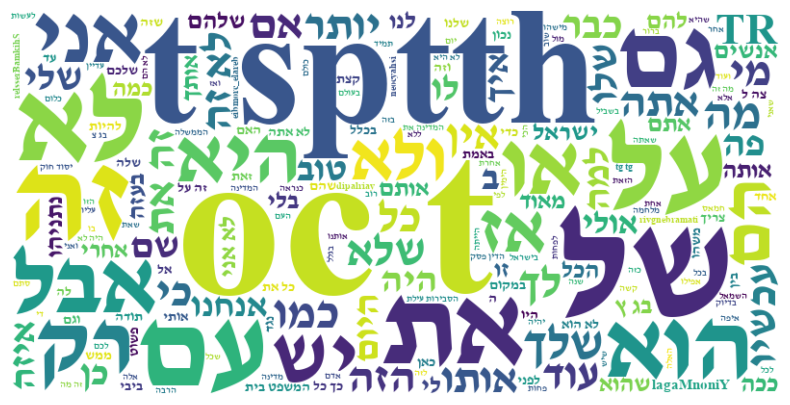

In [100]:
word_cloud(dev.text)

In [101]:
def extract_url(text):
    import re
    # Regular expression pattern to match URLs
    url_pattern = r'(https?://\S+|www\.\S+)'
    # Find all URLs in the text
    urls = re.findall(url_pattern, text)

    # Replace all URLs in the text with <URL>
    replaced_text = re.sub(url_pattern, '<URL>', text)

    return urls,replaced_text



dev['url_split_result'] = dev.text.apply(extract_url)

In [102]:
dev['text_without_url'] = dev['url_split_result'].apply(lambda x:x[1]).str.replace("<URL>","")
dev['text_without_url'].head()

id
1741887071306879293    @AmichaiChikli אפס מאופס. בקרוב תחזור לחור ממנ...
1741702846452474026    @ItzhackH הירש, האם אתה דביל? מטומטם? אידיוט? ...
1741917457239949700    @Shwekster היי, אשמח לאמץ אחד🥺 איך אוכל ליצור ...
1741605356654965247    @rickyricksmusic YES, ALF FROM MELMAK. #love ו...
1741751035423555899    @Lielstagram מה קרה לך זה נראה כמו גיי בסטי ג'...
Name: text_without_url, dtype: object

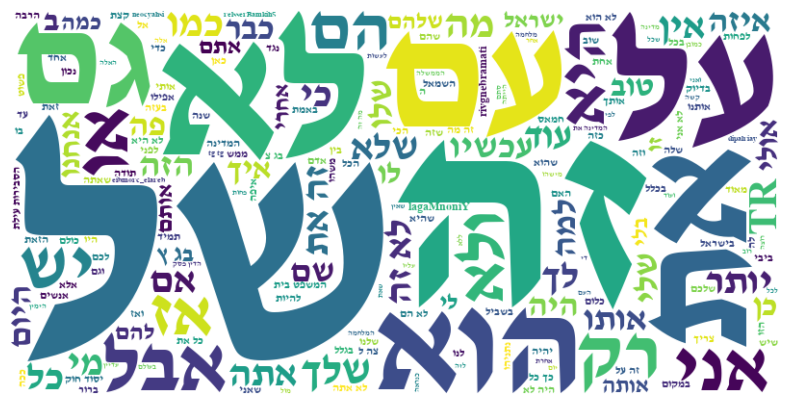

In [103]:
word_cloud(dev.text_without_url)

In [104]:
def remove_punctuation(text):
    import re
    return re.sub(r'[.,:"\'!?()]+', '',text).replace("\n"," ").replace("\t"," ")

dev['text_without_punctuation'] = dev.text_without_url.apply(remove_punctuation)

dev['text_without_punctuation']

id
1741887071306879293    @AmichaiChikli אפס מאופס בקרוב תחזור לחור ממנו...
1741702846452474026    @ItzhackH הירש האם אתה דביל מטומטם אידיוט כל ה...
1741917457239949700    @Shwekster היי אשמח לאמץ אחד🥺 איך אוכל ליצור א...
1741605356654965247    @rickyricksmusic YES ALF FROM MELMAK #love ואה...
1741751035423555899    @Lielstagram מה קרה לך זה נראה כמו גיי בסטי גי...
                                             ...                        
1741890656291713457    @donbardash1984 @netanyahu @YairNetanyahu מעני...
1741868351062728895      3403 ימים בשבי  אברה עדיין חי #BringThemHomeNow
1741911150214647809                                @dverthaim לך לאכול ז
1741938328595824997               הכלבים ששומרים על הדמוקרטיה אומרים לכם
1741894119776047165    @MosheYifrah מי שחתום על האסון הגדול מאז השואה...
Name: text_without_punctuation, Length: 50623, dtype: object

In [105]:
assert dev[dev['text_without_punctuation'].str.contains(",")].shape[0] == 0

In [107]:
dev['text_without_punctuation'].sample(4)

id
1741699282241994808                              @Yosialon2 המון תודה אח
1741588051439084004    RT @AyeletLash הכירו את האחים אווקרה מקבלאן כפ...
1741626151573799394    חניך שלי וחניכים של מישהי שעובדת איתי בשירות כ...
1741690924676096433                      @nir_ @Aboujahjah אתה גאון אחי🤣
Name: text_without_punctuation, dtype: object

In [108]:
def extract_retweete_user(text):
    import re
    mention_pattern = r'RT @\w+'

    # Find all words starting with @ in the text
    mentions = re.findall(mention_pattern, text)

    replaced_text = re.sub(mention_pattern, '<RT>', text)

    return mentions,replaced_text


dev['retweet_split_result'] = dev['text_without_punctuation'].apply(extract_retweete_user)

In [109]:
dev['text_without_rt'] = dev['retweet_split_result'].apply(lambda x:x[1]).str.replace("<RT>","")
dev['text_without_rt'].head()

id
1741887071306879293    @AmichaiChikli אפס מאופס בקרוב תחזור לחור ממנו...
1741702846452474026    @ItzhackH הירש האם אתה דביל מטומטם אידיוט כל ה...
1741917457239949700    @Shwekster היי אשמח לאמץ אחד🥺 איך אוכל ליצור א...
1741605356654965247    @rickyricksmusic YES ALF FROM MELMAK #love ואה...
1741751035423555899    @Lielstagram מה קרה לך זה נראה כמו גיי בסטי גי...
Name: text_without_rt, dtype: object

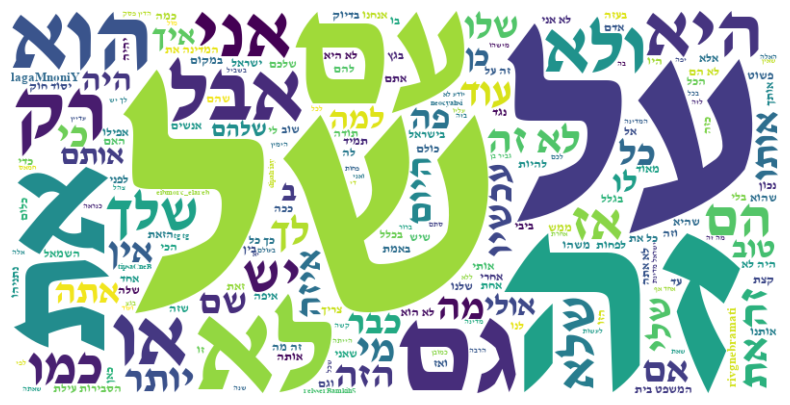

In [110]:
word_cloud(dev.text_without_rt)

In [111]:
def extract_taged_user(text):
    import re
    mention_pattern = r'@\w+'

    # Find all words starting with @ in the text
    mentions = re.findall(mention_pattern, text)

    replaced_text = re.sub(mention_pattern, '<TAG>', text)

    return mentions,replaced_text


dev['tag_split_result'] = dev.text_without_rt.apply(extract_taged_user)
dev['tag_split_result'].sample(7)

id
1741893692489666625    ([], חיילי הימין בעזה ‼️ תחזרו הביתה אתם אזרחי...
1741934791774093804                          ([@mushon_atia], <TAG> ממש)
1741769591812927512              ([@giladlevi73], <TAG> אולי כן אולי לא)
1741738941026390513    ([],  על פסק הדין בנוגע לביטול עילת הסבירות לה...
1741596710684520644    ([@AharoniNurit, @yaronavraham, @N12News], <TA...
1741865638157541501    ([], רוב של 12 מתוך 15 שמותר לפסול חוק יסוד זה...
1741896669602451913             ([@TamArbel4], <TAG> עם ישראל חי ויצליח)
Name: tag_split_result, dtype: object

In [112]:
dev['text_without_tag'] = dev['tag_split_result'].apply(lambda x:x[1]).str.replace("<TAG>","")
dev['text_without_tag'].head()

id
1741887071306879293                 אפס מאופס בקרוב תחזור לחור ממנו יצאת
1741702846452474026     הירש האם אתה דביל מטומטם אידיוט כל התשובות נכ...
1741917457239949700           היי אשמח לאמץ אחד🥺 איך אוכל ליצור איתך קשר
1741605356654965247     YES ALF FROM MELMAK #love ואהבת את יהוה אלהיך...
1741751035423555899     מה קרה לך זה נראה כמו גיי בסטי גיזס זה הסוג ג...
Name: text_without_tag, dtype: object

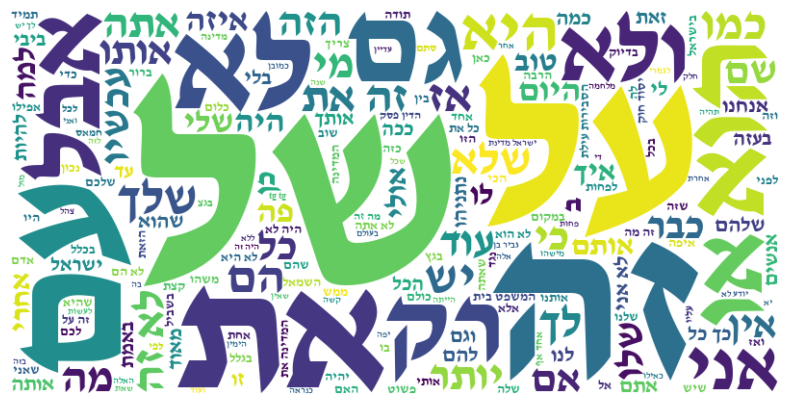

In [113]:
word_cloud(dev.text_without_tag)

In [114]:
def get_stopwords() -> set[str]:
    """
    Returns a list of stopwords in hebrew based on pre-loaded file along with added words that are unique to this corpus.
    """
    stop_path = "heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines = in_file.readlines()
        res = [l.strip() for l in lines]
        res.extend([",", ".",'-','–',"\"","\t","ה", "ל", "ב", "ו", "ש", "מ", "של", "על", "את", "או",
                         "הוא", "לא", "אם", "כל", "כ", "עם", "הם", "היא", "הן"])
    return set(res)

def get_non_stop_words(df):
    stopwords = get_stopwords()
    return ' '.join([w for w in df.split() if w not in stopwords])



dev['text_without_stop_word'] = dev.text_without_tag.apply(get_non_stop_words)
dev['text_without_stop_word'].head()

id
1741887071306879293                      אפס מאופס בקרוב תחזור לחור יצאת
1741702846452474026    הירש דביל מטומטם אידיוט התשובות נכונות #נתניהו...
1741917457239949700                             היי לאמץ אחד🥺 ליצור איתך
1741605356654965247    YES ALF FROM MELMAK #love ואהבת יהוה אלהיך לבב...
1741751035423555899                     קרה גיי בסטי גיזס הסוג גיזס כיפי
Name: text_without_stop_word, dtype: object

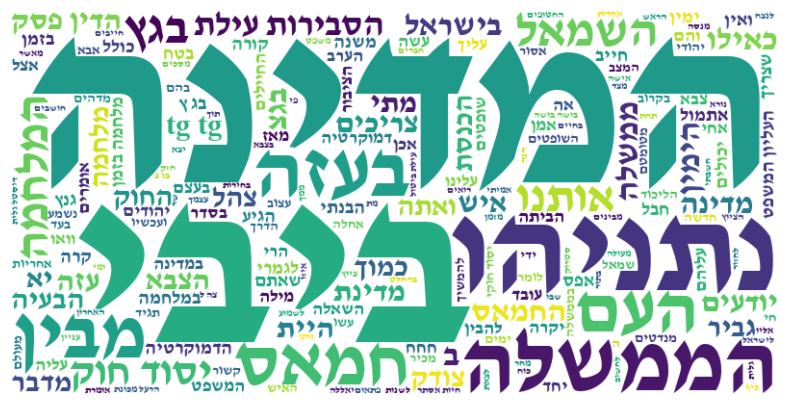

In [115]:
word_cloud(dev.text_without_stop_word)

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n):
    """
    Returns a list of all n-grams in given corpus, sortes by frequency.
    """
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq


get_top_ngram(dev.text_without_stop_word,n=2)


[('חוק יסוד', 382),
 ('עילת הסבירות', 378),
 ('פסק הדין', 280),
 ('gt gt', 246),
 ('המשפט העליון', 211),
 ('בזמן מלחמה', 205),
 ('חוקי יסוד', 157),
 ('מכונת הרעל', 143),
 ('גלית דיסטל', 141),
 ('ביטול עילת', 137),
 ('בושה בושה', 134),
 ('אסתר חיות', 122),
 ('פסק דין', 115),
 ('יריב לוין', 93),
 ('עמית סגל', 92),
 ('שופטים בירושלים', 75),
 ('הדמוקרטיה הישראלית', 75),
 ('הציונות הדתית', 72),
 ('חיל האוויר', 70),
 ('אורית סטרוק', 70),
 ('זכרו ברוך', 67),
 ('יום_חג השאלה_של', 65),
 ('בשנה האחרונה', 64),
 ('יהי זכרו', 63),
 ('64 מנדטים', 62),
 ('לשאול שאלות', 62),
 ('העם היהודי', 61),
 ('גלית_דיסטל גיא_פלג', 59),
 ('גלית_דיסטל היא_שרה', 58),
 ('היא_שרה ישי_כהן', 58),
 ('ישי_כהן בנק_ישראל', 58),
 ('חפים מפשע', 58),
 ('מערכת המשפט', 57),
 ('אהרון ברק', 56),
 ('12 15', 56),
 ('מכונת רעל', 56),
 ('לפסול חוק', 55),
 ('בגץ פסל', 55),
 ('שבית המשפט', 54),
 ('לבית המשפט', 53),
 ('ההפיכה המשטרית', 51),
 ('חיילי צהל', 51),
 ('15 שופטים', 51),
 ('גיא_פלג שבת_שלום', 51),
 ('שנת 2024', 50),
 ('הפיכה משט

In [117]:
def lda_modaling(corpus,num_topics):

    import gensim

    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                        num_topics=num_topics, 
                                        id2word=dic,
                                        passes=10, 
                                        workers=2)
    return lda_model,lda_model.show_topics(num_topics=num_topics)

corpus = [row.split() for row in dev.text_without_stop_word.to_list()]
lda_model,topics = lda_modaling(corpus,num_topics=25)

/Users/erlichsefi/Documents/Notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/erlichsefi/Documents/Notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [118]:
topics

[(0,
  '0.031*"נתניהו" + 0.021*"ביבי" + 0.011*"הממשלה" + 0.011*"באוקטובר" + 0.010*"גביר" + 0.010*"עלינו" + 0.010*"הביתה" + 0.009*"המדינה" + 0.008*"גנץ" + 0.007*"סביר"'),
 (1,
  '0.023*"2" + 0.016*"1" + 0.015*"3" + 0.010*"4" + 0.010*"מדהים" + 0.008*"מיליון" + 0.007*"אחלה" + 0.006*"5" + 0.006*"14" + 0.005*"בערוץ"'),
 (2,
  '0.008*"כיף" + 0.008*"בטוויטר" + 0.007*"בוא" + 0.006*"בשנה" + 0.006*"בי" + 0.006*"מטורף" + 0.005*"ליד" + 0.005*"הדם" + 0.005*"צה״ל" + 0.005*"מנסה"'),
 (3,
  '0.018*"בגץ" + 0.018*"העם" + 0.018*"הסבירות" + 0.015*"בגצ" + 0.014*"עילת" + 0.014*"הדמוקרטיה" + 0.011*"הימין" + 0.008*"מדינה" + 0.008*"בג״ץ" + 0.008*"12"'),
 (4,
  '0.033*"חוק" + 0.028*"יסוד" + 0.024*"המשפט" + 0.013*"העליון" + 0.012*"חוקי" + 0.012*"החוק" + 0.009*"שופטים" + 0.009*"לבטל" + 0.008*"הכנסת" + 0.008*"סמכות"'),
 (5,
  '0.009*"אכפת" + 0.008*"תמשיך" + 0.007*"עזה" + 0.007*"לשנה" + 0.007*"איתם" + 0.006*"השאלה" + 0.006*"נותן" + 0.005*"חיל" + 0.005*"חכם" + 0.005*"אלוף"'),
 (6,
  '0.011*"לגמרי" + 0.010*"הממשלה" +

In [119]:
def n_gram(row):

    splited = row.split()
    response = list()
    for i in range(len(splited)-1):
        response.append(f"{splited[i]} {splited[i+1]}")
    return response



lda_model,topics = lda_modaling([n_gram(row) for row in dev.text_without_stop_word.to_list()],num_topics=25)

/Users/erlichsefi/Documents/Notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/erlichsefi/Documents/Notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [120]:
topics

[(0,
  '0.002*"חיילי צהל" + 0.002*"דובר צהל" + 0.001*"מחנה הימין" + 0.001*"בשנים האחרונות" + 0.001*"סתמו תפה" + 0.001*"שנאה ופילוג" + 0.001*"ישי כהן" + 0.001*"גייס חמישי" + 0.001*"מפיצים שנאה" + 0.001*"נלחמים הבית"'),
 (1,
  '0.002*"ממשלת ימין" + 0.002*"לפסול חוקי" + 0.002*"בימים האחרונים" + 0.002*"רצועת עזה" + 0.001*"אפס מאופס" + 0.001*"הסכמה רחבה" + 0.001*"שקמה ברסלר" + 0.001*"בשורות טובות" + 0.001*"חוקי יסוד" + 0.001*"ניו יורק"'),
 (2,
  '0.014*"פסק הדין" + 0.004*"פסק דין" + 0.003*"לשאול שאלות" + 0.002*"שבית המשפט" + 0.001*"במילים אחרות" + 0.001*"מותר לשאול" + 0.001*"הדין בעניין" + 0.001*"חתיכת אפס" + 0.001*"חיילי צה״ל" + 0.001*"בערוץ 12"'),
 (3,
  '0.006*"המשפט העליון" + 0.005*"אסתר חיות" + 0.005*"חוק יסוד" + 0.005*"יריב לוין" + 0.003*"לבית המשפט" + 0.002*"בהסכמה רחבה" + 0.002*"לפרסם פסק" + 0.002*"ברצועת עזה" + 0.002*"יסוד החקיקה" + 0.002*"חשבון נפש"'),
 (4,
  '0.003*"חוק יסוד" + 0.002*"יסוד ברוב" + 0.001*"מאז השואה" + 0.001*"מדינה דמוקרטית" + 0.001*"ברוכה הבאה" + 0.001*"מדינת היהו

In [121]:
topics_by_gpt = {
  "0": "פוליטיקה והתקשורת",
  "1": "פסק הדין וביקורת חריפה",
  "2": "עמית סגל והחלטות משפט",
  "3": "הדמוקרטיה הישראלית והציונות הדתית",
  "4": "יריב לוין והפיכה משטרית",
  "5": "חפים מפשע וביקורת על הממשלה",
  "6": "החטופים וציוצים פוליטיים",
  "7": "מכונת הרעל ואסתר חיות",
  "8": "חוק יסוד והמשפט העליון",
  "9": "פוליטיקאים והתקשורת",
  "10": "בחירות ושופטי בגץ",
  "11": "חיילי צה\"ל וביקורת על הממשלה",
  "12": "זיכרון והנצחה במלחמה",
  "13": "האשטגים וציוצים פוליטיים",
  "14": "מלחמה ושנאת חינם",
  "15": "בושה ובית המשפט העליון",
  "16": "ה-7 באוקטובר ונבחרי הציבור",
  "17": "חוק יסוד וביקורת על הכנסת",
  "18": "יהדות ואמונה",
  "19": "גלית דיסטל ושאלות פוליטיות",
  "20": "העם היהודי ואהרון ברק",
  "21": "אורית סטרוק וכבוד האדם",
  "22": "ביקורת פוליטית ואישית",
  "23": "עילת הסבירות וביטולה",
  "24": "מכונת רעל וביקורת על הממשלה"
}


In [154]:
import gensim


dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

dev_tag = pd.DataFrame(columns=['Text', 'Topic', 'Topic_Prob', 'TopicWords'])

for i in range(len(bow_corpus)):
    top_topics = lda_model.get_document_topics(bow_corpus[i])
    top_topics.sort(key=lambda x: x[1], reverse=True)
    topic, prob = top_topics[0]
    if str(topic) in topics_by_gpt and prob > 0.5:
        dev_tag.loc[i] = [dev.iloc[i]['text'], topics_by_gpt[str(topic)], prob, topics[topic]]



In [157]:
dev_tag.to_csv("data-train.csv",index=False)

In [123]:
dev_tag.shape

(10253, 4)

In [124]:
dev_tag

,Text,Topic,Topic_Prob,TopicWords
0,"[אפס, מאופס, בקרוב, תחזור, לחור, יצאת]",עילת הסבירות וביטולה,0.582232,"(23, 0.006*""גלית דיסטל"" + 0.003*""יהי זכרו"" + 0..."
1,"[הירש, דביל, מטומטם, אידיוט, התשובות, נכונות, ...",פוליטיקה והתקשורת,0.838796,"(0, 0.002*""חיילי צהל"" + 0.002*""דובר צהל"" + 0.0..."
2,"[היי, לאמץ, אחד🥺, ליצור, איתך]",החטופים וציוצים פוליטיים,0.505297,"(6, 0.003*""הציונות הדתית"" + 0.002*""שלושה חודשי..."
3,"[YES, ALF, FROM, MELMAK, #love, ואהבת, יהוה, א...",בחירות ושופטי בגץ,0.680483,"(10, 0.003*""חוקי יסוד"" + 0.003*""לבטל חוקי"" + 0..."
4,"[קרה, גיי, בסטי, גיזס, הסוג, גיזס, כיפי]",החטופים וציוצים פוליטיים,0.632607,"(6, 0.003*""הציונות הדתית"" + 0.002*""שלושה חודשי..."
...,...,...,...,...
50594,[בטח],אורית סטרוק וכבוד האדם,0.518329,"(21, 0.003*""3 חודשים"" + 0.002*""יאיר לפיד"" + 0...."
50595,[קראתי],פוליטיקאים והתקשורת,0.515171,"(9, 0.008*""מכונת הרעל"" + 0.003*""#גלית_דיסטל #ה..."
50598,"[סזון, התחלנו]",חוק יסוד וביקורת על הכנסת,0.515399,"(17, 0.011*""בזמן מלחמה"" + 0.002*""רפואה שלמה"" +..."
50608,[חחח],החטופים וציוצים פוליטיים,0.515171,"(6, 0.003*""הציונות הדתית"" + 0.002*""שלושה חודשי..."


In [125]:
(dev_tag['Text'].apply(len) == 0).any()

False

In [146]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vectorizer = CountVectorizer(stop_words=list(get_stopwords()),ngram_range=(2, 2))
dev_counts = count_vectorizer.fit_transform(dev_tag['Text'].str.join(" "))

transformer = TfidfTransformer()

dev_vectors = transformer.fit_transform(dev_counts)
# X_train_tfidf = transformer.transform(X_train_counts)


Confusion Matrix:


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (10253).

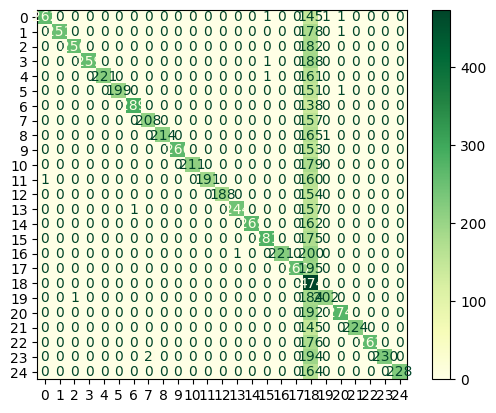

In [153]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# import pickle

# model = LogisticRegression()
# clf = model.fit(dev_vectors, dev_tag['Topic'])
# predicted  = clf.predict(dev_vectors)


# with open(f"production.pkl", 'wb') as file:
#     pickle.dump(model,file)

# cm = confusion_matrix(dev_tag['Topic'], predicted)
# cmd = ConfusionMatrixDisplay(cm, display_labels=dev_tag['Topic'])
# print("Confusion Matrix:")
# cmd.plot(xticks_rotation=90, cmap="YlGn")